<br>

**<font size="5">Table of contents</font>** 

 - [**Chapter 1: Introduction**](#Chapter1)
     - [**1.1 Goal**](#1.1)
     - [**1.2 Statistical methods**](#1.2)
 - [**Chapter 2: Data and portfolio construction**](#Chapter2)
     -  [**2.1 Risk free rate (RF)**](#2.1)
     - [**2.2 High Minus Low (HML) portfolio**](#2.2)
     - [**2.3 Winners Minus Losers (WML) portfolio**](#2.3)
     - [**2.4 50-50 Value Momemtum Portfolio**](#2.4)
     - [**2.5 Market Portfolio**](#2.5)
     - [**2.6 Comparison Portfolios**](#2.6)
 - [**Chapter 3:  Risk- risk reward ratio's and Data exploration**](#Chapter3)
     - [**3.1 Return and risk reward ratio's**](#3.1)
     - [**3.2 Data exploration**](#3.2)
      
 - [**Chapter 4: References**](#Chapter4)

<a id='Chapter1'></a>
# Chapter 0: Introduction

<a id='1.1'></a>
## Goal
 

Try to answer whether recent performance of value and momentum is in line with historical performance. Several people have noticed that most factors did not deliver much return in the last 15 years. Are the value and momentum broken or just experiencing a period of bad luck? 

**This notebook** introduces the `portfolio formation` and performs some initial `data exploration`.
<a id='0.2'></a>
## Statistical methods 

 - **Simulation under normality:** approximates factor returns by normal distributions
that I calibrate using the sample means and standard deviations from the full
sample.


- **The independent bootstrap:** 
resamples each factor’s return independently with replacement (i.e., allowing observations to
be chosen multiple times) from every other factor. This bootstrap scheme
preserves the empirical distributions of factor returns that is, it accounts for
deviations from normality, but does not account for serial correlations in factor returns.


- **Block bootstrap**: The independent bootstrap requires that the data being bootstrapped is independent and identically distributed (iid). This does not work well for time series, where serial correlation is present. One approach that addresses this limitation is block bootstrapping. There are several versions of the block bootstrap, I will look at the:  
<br> 
    - **Circular block bootstrap (CBB)**: is an improvement on the [**moving block bootstrap (MBB)**](https://www.youtube.com/watch?v=-M1UtvoajUY). The MBB randomly draws fixed overlapping blocks from the data and cut and pastes them to form a new series the same size as the original data. However, it has a major limitation in that beginning and ending points are systematically underrepresented. To address this limitation an extension to this method was developed called the Circular Block Bootstrap (CBB). This approach is much the same except that it wraps around the beginning and ending points to ensure they are drawn with similar probability as the other blocks. 
<br>

    - **Stationary bootstrap (SB)**: One limitation of the circular block bootstrap is the fixed block size. Different block sizes emphasize different periods or lengths of autocorrelation (memory). At the extremes you can take a block size so small that no serial correlation is captured, and at the other end you could take a block size so large that you end up sampling the original series. To address the fixed block sizes, the Stationary Bootstrap (SB) randomly samples blocks from a geometric distribution with mean $k$. The advantage of this approach is that the circular block bootstrap doesn't quite give us a stationary time series (The distribution of $R_{k-1:k}$ is not the same as the distribution of $R_{k:k+1}$). Averaging over the random choices of block lengths overcomes this problem.

Note that the CBB, SB and MBB all sample overlapping blocks in contrast, the **[fixed block bootstrap](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Carlstein+%281986%29&btnG)** samples distinct blocks. I found an excellent implementation of these methods from the [**ARCH package**](https://arch.readthedocs.io/en/latest/bootstrap/timeseries-bootstraps.html). 

**Bootstrap implementation**

When bootstrapping the simulated paths for different investment horizons, I use the total length of the observed path to sample from. As a result, I obtain a  matrix where each column is a simulated path. Similar as **[Fama and French](https://academic.oup.com/raps/article-abstract/8/2/232/4810768)** I then calibrate the number of rows of this matrix depending on the investment horizon.

<a id='0.3'></a>
## Data and portfolio construction 

I will be using daily returns (possible to change to monthy) obtained from [**Kenneth French's data library**](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) for the US stock market (NYSE, AMEX, and NASDAQ) over the period  03/01/1927 to 28/02/2019. The data can be sourced directly from their website using [**Pandas datareader**](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html). Note thate the Fama-French returns are simple raw returns (not log returns). 

**As a reminder:**

 - A **value strategy** favors high fundamentals-to-price ratios by going long these stocks, while selling short those stocks
that have lower fundamentals-to-price ratios.
 - On the other hand, a **momentum strategy** exploits the phenomenon that securities which have performed well relative
to peers (winners) on average continue to outperform, and securities that have performed relatively poorly (losers) tend to
continue to under-perform.

**Long-Short Portfolio Construction:**

There are different ways to construct long-short value and momentum portfolio's. For now I will construct the portfolio's as **[Fama and French (2012)](https://www.sciencedirect.com/science/article/pii/S0304405X12000931)**:

  -  **Value Portfolio (HML):** 
 <br>
 
 - `book equity (BE)`
 - `market equity (ME)`
      
 is formed by first splitting the universe of stocks into two size categories: `Small (S)  and Big (B)` using NYSE market cap medians and then splitting stocks `into three groups based on book-to-market equity highest 30% (H), middle 40% (M), and lowest 30% (L)`, using NYSE breakpoints. The intersection of stocks across the six categories are value-weighed and used to form the portfolios SH (small, high $\frac{BE}{ME}$), SM (small, middle $\frac{BE}{ME}$), SL (small, low $\frac{BE}{ME}$), BH (big, high $\frac{BE}{ME}$), BM (big, middle $\frac{BE}{ME}$), and BL (big, low $\frac{BE}{ME}$). HML is the average of the two high book-to-market portfolios minus the average of the two low book-to-market portfolios. 

\begin{equation} \text{HML} =	\frac{1}{2}\times  (\text{Small High Value} + \text{Big High Value})
 - \frac{1}{2}\times (\text{Small Low Value} + \text{Big Low Value})\end{equation}

 - **Momentum portfolio (WML):** is constructed similarly to HML in which six value-weight portfolios formed on size and prior (2-12) returns to construct momentum. Specifically, prior (2-12) returns is defined as the past 12-month return, skipping the most recent months return to avoid micro-structure and liquidity biases and now generally used as the standard definition of momentum. The portfolios, which are formed daily, are the `intersections of 2 portfolios formed on size (market equity, ME) and 3 portfolios formed on prior (2-12) return`. The daily size breakpoint is the median NYSE market equity. The daily prior (2-12) return breakpoints are the 30th and 70th NYSE percentiles. Momentum is the average return on the two high prior return portfolios (Winners) minus the average return on the two low prior return portfolios (Losers)

\begin{equation} \text{WML} =	\frac{1}{2}\times  (\text{Small Winners} + \text{Big Winners})
 - \frac{1}{2}\times (\text{Small Losers} + \text{Big Losers})\end{equation}


 - **Value-Momentum portfolio (HML-WML)**: is a `50-50 weighting` of the value and momentum strategy.
 

The analysis is organized as follow: I start with construction the portfolios in [**Chapter 2**](#Chapter2). Next, I introduce some common performance statistics and perform some exploratory data analysis in [**Chapter 3**](#Chatper3). 


At the top of each chapter I have declared which functions are being used. To keep the notebook as well-organized as possible, I have decided to put these functions into a separate file named `simulation_lib_log` . Furthermore, note that I use strategies, portfolios, factors interchangeably throughout the analysis. They all have the same interpretation. 

**<font size="5">Import libraries</font>**

In [1]:
# clear all variables each time you rerun the script
from IPython import get_ipython
get_ipython().magic('reset -sf')

from pathlib import Path

import datetime
import os 
import warnings
warnings.filterwarnings("ignore")
os.chdir("C:\\Users\Pieter-Jan\Documents\Factor_Crashes\Thesis\Images")

# scientific libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats.mstats import gmean
import statsmodels.api as sm
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
from random import randint
from pandas import Series

# test for stationarity
from statsmodels.tsa.stattools import adfuller
# bootstrap libraries
from arch.bootstrap import (CircularBlockBootstrap, IIDBootstrap,
                            MovingBlockBootstrap, StationaryBootstrap)

# plot libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import seaborn as sns
#import brewer2mpl
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.ticker import FormatStrFormatter

# imports file with all custum functions
from importlib import reload 
import simulation_log_lib
# instead of listing all individual functions, we chose here to load everything
# Make sure to use unique function names, though, or you might overrule built-in functions
reload(simulation_log_lib)
from simulation_log_lib import *

# plot parameters
sns_params = {
    'font.family':'serif',
    'font.size': 12,
    'font.weight': 'medium',
    'figure.figsize': (10, 7),
}
plt.style.use('seaborn-talk')
plt.style.use('bmh')
sns.set_context(sns_params)
savefig_kwds = dict(dpi=300, bbox_inches='tight', frameon=True, format='png')
set2=['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9']
#plt.style.available
#sns.set(style='darkgrid', context='talk')
%matplotlib inline

<a id='Chapter2'></a>
# Chapter 2: Data and portfolio construction

I start with constructing the four portfolios:
 - The market portfolio (Mkt-RF)
 - The value portfolio (HML)
 - The momentum portfolio (WML)
 - A 50-50 weighted value-momentum portfolio (HML-WML)
 
I will implement the long-short portfolio myself using the raw portfolio sorts to walk through implementation process. For the market portfolio there is no sorting involved since this is just a value weighted portfolio of all stocks (NYSE, AMEX, and NASDAQ) minus the risk free. Finally, for the HML-WML portfolio, I choose arbitrarily a 50-50 weighting.

**<font size="4">Helper function</font>**

 - `cumsum_plot:` plots the cumulative return 

**<font size="4">Global parameters</font>**

Global parameters are defined in CAPITAL LETTERS. This makes it is easy to quickly change from daily data to monthly and some other parameters.

In [2]:
# data frequency, easy to change between month and daily data
FREQUENCY = 252    # assuming 252 trading days in a year
START_YEAR = 1927  # start year when sourcing the portfolios from FAMA AND FRENCH
BLOCKSIZE = 126  # blocksize, for the stationary bootstrap this is the mean of the geometric distribution

# Portfolio names from FAMA AND FRENCH ; to switch to monthly just remove '_daily'
VALUE = '6_Portfolios_2x3_daily'
MOMENTUM = '6_Portfolios_ME_Prior_12_2_daily'

# Save data portfolios
PATH_DATA='C:\\Users\\Pieter-Jan\\Documents\\Factor_Crashes\\Code\\Simulation\\Portfolios\\'

In [3]:
# get a look at all the available portfolios
print(len(get_available_datasets()))
get_available_datasets()[:5]

286


['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

<a id='2.1'></a>
## Risk free rate (RF)

include the risk free rate in case we need it

In [4]:
# load the data for the value factor
dic_RF = web.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', start=START_YEAR)
Rf = pd.DataFrame(dic_RF[0]["RF"],columns = ["RF"])
Rf.tail()

,RF
Date,
2019-03-25,0.009
2019-03-26,0.009
2019-03-27,0.009
2019-03-28,0.009
2019-03-29,0.009


<a id='2.2'></a>
## High Minus Low (HML) portfolio 

In [5]:
# load the data for the value factor
dic_HML = web.DataReader(VALUE, 'famafrench', start=START_YEAR)
print(dic_HML['DESCR'])

6 Portfolios 2x3 daily
----------------------

This file was created by CMPT_ME_BEME_RETS_DAILY using the 201903 CRSP database. It contains value-weighted returns for the intersections of 2 ME portfolios and 3 BE/ME portfolios. The portfolios are constructed at the end of June. ME is market cap at the end of June. BE/ME is book equity at the last fiscal year end of the prior calendar year divided by ME at the end of December of the prior year. Missing data are indicated by -99.99 or -999. The break points use Compustat firms plus the firms hand-collected from the Moodys Industrial, Transportation, Utilities, and Financials Manuals. The portfolios use Compustat firms plus the firms hand-collected from the Moodys Industrial, Transportation, Utilities, and Financials Manuals. Copyright 2019 Kenneth R. French

  0 : Average Value Weighted Returns -- Daily (24302 rows x 6 cols)
  1 : Average Equal Weighted Returns -- Daily (24302 rows x 6 cols)
  2 : Number of Firms in Portfolios (24302 row

            SMALL LoBM  ME1 BM2  SMALL HiBM  BIG LoBM  ME2 BM2  BIG HiBM
Date                                                                    
1927-01-03       -0.42    -1.00       -0.49     -1.07    -0.58     -0.83
1927-01-04        0.98     0.50       -0.08      0.55     0.16      0.25
1927-01-05        0.95     0.25        0.49      0.31    -0.07      0.15
1927-01-06       -0.11    -0.14       -0.18     -0.21    -0.24      0.01


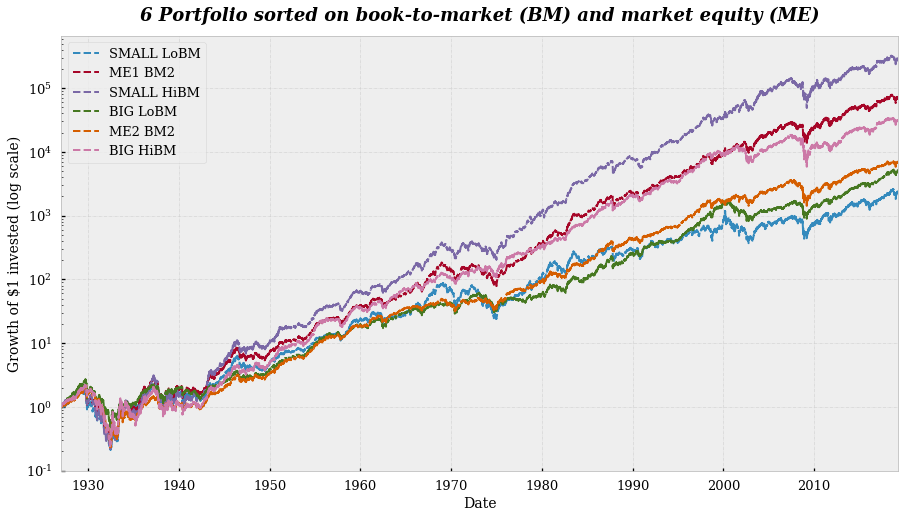

In [6]:
df_HML = dic_HML[0]
df_HML.index = df_HML.index.astype('datetime64[ns]')
print(df_HML.head(n=4))
cumsum_plot(
    df=df_HML,
    title=
    f"{df_HML.shape[1]} Portfolio sorted on book-to-market (BM) and market equity (ME)"
)

### Construct HLM long short portfolio

In [7]:
# long short value portfolio
longs, shorts = ['SMALL HiBM', 'BIG HiBM'], ['SMALL LoBM', 'BIG LoBM']
HML_LS = pd.DataFrame(df_HML.loc[:, longs].mean(axis=1) -
                      df_HML.loc[:, shorts].mean(axis=1),
                      columns=['HML_VW'])  # value weighted HML

,HML_VW
Date,
2019-03-25,-0.300
2019-03-26,0.425
2019-03-27,0.515
2019-03-28,-0.090
2019-03-29,-0.850


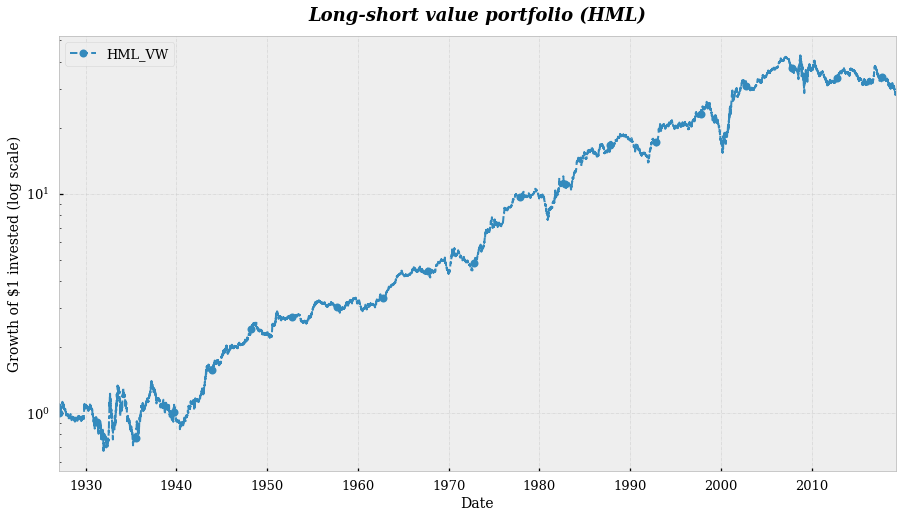

In [8]:
cumsum_plot(df=HML_LS, title="Long-short value portfolio (HML)")
HML_LS.tail(n=5)

 <a id='2.3'></a>
## Winners Minus Losers (WML) portfolio

In [9]:
# load the data for the momentum factor
dic_WML = web.DataReader(MOMENTUM, 'famafrench', start=START_YEAR)
print(dic_WML['DESCR'])

6 Portfolios ME Prior 12 2 daily
--------------------------------

This file was created by CMPT_ME_PRIOR_RETS_DAILY using the 201903 CRSP database. It contains value- weighted returns for the intersections of 2 ME portfolios and 3 prior return portfolios. The portfolios are constructed daily. ME is market cap at the end of the previous day. PRIOR_RET is from - 250 to - 21. Missing data are indicated by -99.99 or -999. Copyright 2019 Kenneth R. French

  0 : Average Value Weighted Returns -- Daily (24302 rows x 6 cols)
  1 : Average Equal Weighted Returns -- Daily (24302 rows x 6 cols)


In [10]:
df_WML = dic_WML[0]
df_WML.index = df_WML.index.astype('datetime64[ns]')
df_WML.head(n=5)

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR
Date,,,,,,
1927-01-03,-0.30,-0.20,-0.78,-1.69,-0.57,-1.14
1927-01-04,0.53,0.08,0.30,0.68,0.22,0.53
1927-01-05,0.85,0.54,0.46,0.58,0.16,0.01
1927-01-06,0.11,-0.13,-0.20,-0.05,-0.34,-0.04
1927-01-07,0.04,0.13,0.72,-0.11,0.25,0.49


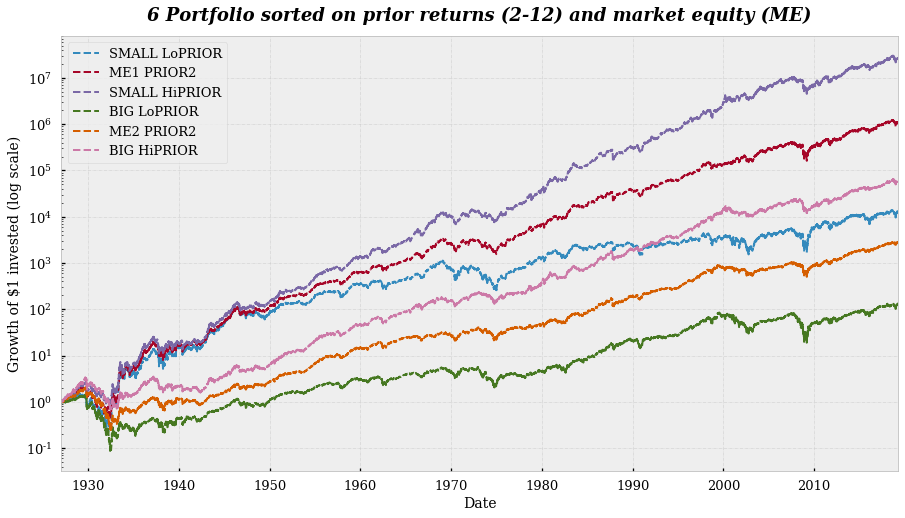

In [11]:
cumsum_plot(
    df=df_WML,
    title=f"{df_WML.shape[1]} Portfolio sorted on prior returns (2-12) and market equity (ME)"
)

### Construct WML long short portfolio

,WML_VW
Date,
1927-01-03,0.035
1927-01-04,-0.190
1927-01-05,-0.480
1927-01-06,-0.150
1927-01-07,0.640


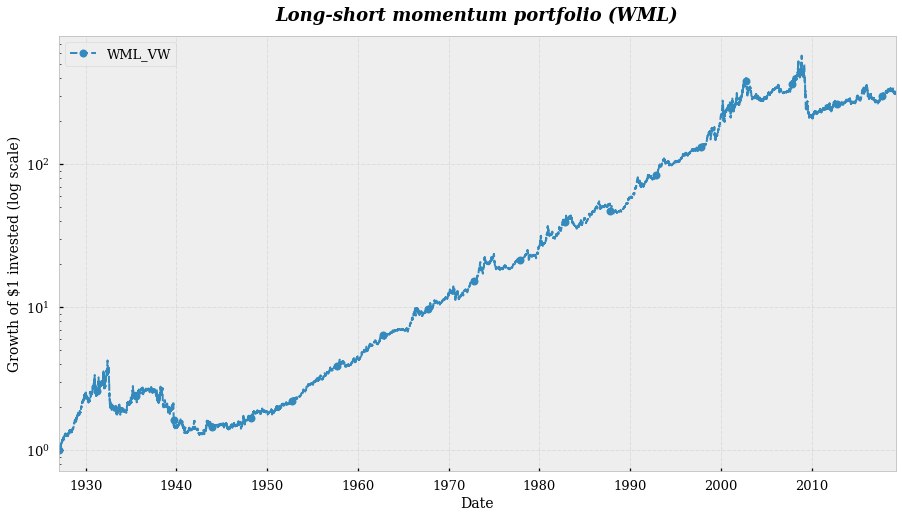

In [12]:
# long short momentum portfolio
longs, shorts = ['SMALL HiPRIOR',
                 'BIG HiPRIOR'], ['SMALL LoPRIOR', 'BIG LoPRIOR']
WML_LS = pd.DataFrame(df_WML.loc[:, longs].mean(axis=1)  -
                      df_WML.loc[:, shorts].mean(axis=1),
                      columns=['WML_VW']) 
# plot the cumulative return
cumsum_plot(df=WML_LS, title="Long-short momentum portfolio (WML)")
WML_LS.head(n=5)

###  Number of firms and value and momentum portfolios

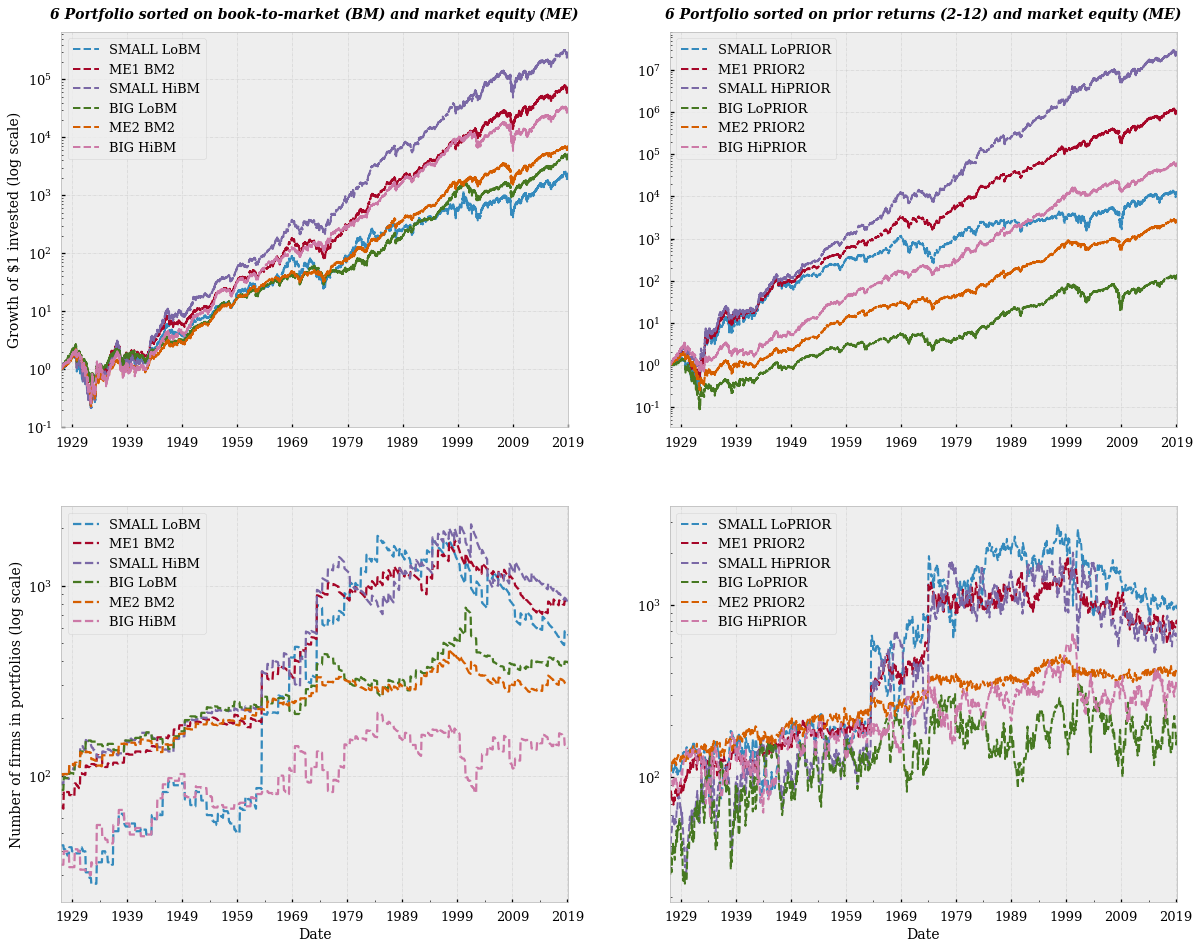

In [13]:
# number of firms uses monthly data
VALUE_month = '6_Portfolios_2x3'
MOMENTUM_month = '6_Portfolios_ME_Prior_12_2'

# compare the long short value and momentum portfolio
fig, ax = plt.subplots(2,2,figsize=(20,16))
ax = ax.ravel()

# HML
cumsum_plot(
    df=df_HML,
    title=f"{df_HML.shape[1]} Portfolio sorted on book-to-market (BM) and market equity (ME)",
    ax=ax[0],
    fontsize_title=14
)

# WML
cumsum_plot(
    df=df_WML,
    title=f"{df_WML.shape[1]} Portfolio sorted on prior returns (2-12) and market equity (ME)",
    ax=ax[1],
    fontsize_title=14
)
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[1].yaxis.set_label_text("")

# HML number of firms
df = web.DataReader(VALUE_month,'famafrench', start=START_YEAR)[4]
df.plot(ax=ax[2],style="--",lw=2.25)
ax[2].set_yscale('log')
ax[2].set_ylabel("Number of firms in portfolios (log scale)",size=14)
ax[2].set_xlabel(xlabel="Date",size=14)
ax[2].set_xlim(df.index[0],df.index[-1])
ax[2].grid(True, which='major', linestyle='-.', color='0.8')


# WML number of firms
df = web.DataReader(MOMENTUM_month,'famafrench', start=START_YEAR)[4]
df.plot(ax=ax[3],style="--",lw=2)
ax[3].set_yscale('log')
#ax[3].set_ylabel("Number of firms in portfolios (log scale)",size=14)
ax[3].set_xlabel(xlabel="Date",size=14)
ax[3].yaxis.set_label_text("")
ax[3].set_xlim(df.index[0],df.index[-1])
ax[3].grid(True, which='major', linestyle='-.', color='0.8')


start, end = ax[0].get_xlim()
stepsize=3655 # magic number to match dates from lower to upper plots
for i in range(2):
    ax[i].xaxis.set_ticks(np.arange(start+750, end, stepsize))

#plt.tight_layout()
plt.savefig('HML_WML', bbox_inches='tight') # save plot

<a id='1.4'></a>
## 50-50 Value Momemtum Portfolio 

,HML-WML
Date,
1927-01-03,0.065
1927-01-04,-0.484
1927-01-05,-0.378
1927-01-06,-0.015
1927-01-07,0.520


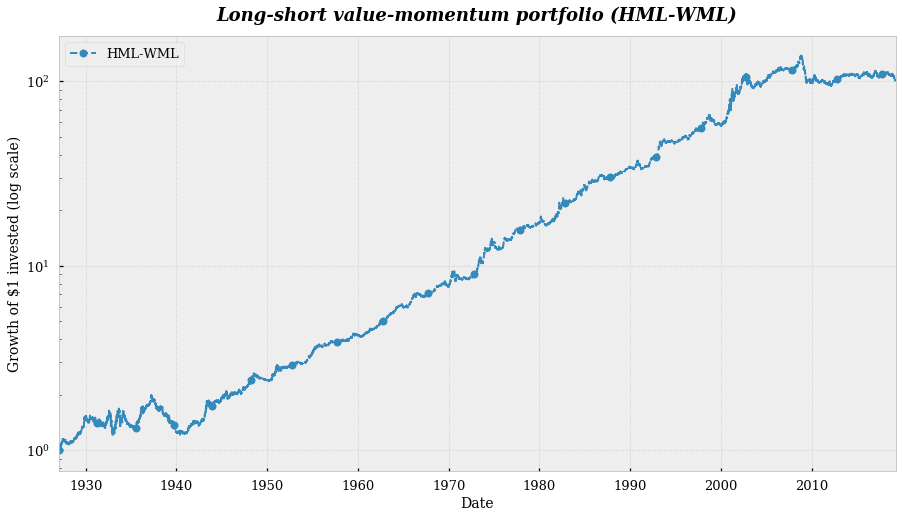

In [14]:
w_HML, w_WML = 0.60, 0.40  #weights 40-60 weights (Asness and Frazzini (2013))

HML_WML = pd.DataFrame(HML_LS.values * w_HML +
                       WML_LS.values * w_WML,
                       columns=["HML-WML"],
                       index=HML_LS.index)

cumsum_plot(df=HML_WML, title="Long-short value-momentum portfolio (HML-WML)")
HML_WML.head()

 <a id='1.5'></a>
## Market Portfolio

This is just the market (Mkt) portfolio minus the risk free rate (RF). I use this as the benchmark since basically every investor (including you and me) can buy this portfolio for almost no fee (there is no performance fee involved). You can think of this portfolio as the **[S&P500](https://en.wikipedia.org/wiki/S%26P_500_Index)**, but containing many more firms.

In [15]:
Mkt_dic = web.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', start=START_YEAR)
Mkt_dic['DESCR']

'F-F Research Data Factors daily\n-------------------------------\n\nThis file was created by CMPT_ME_BEME_RETS_DAILY using the 201903 CRSP database. The Tbill return is the simple daily rate that, over the number of trading days in the month, compounds to 1-month TBill rate from Ibbotson and Associates Inc. Copyright 2019 Kenneth R. French\n\n  0 : (24302 rows x 4 cols)'

,Mkt-RF
Date,
1927-01-03,-0.79
1927-01-04,0.31
1927-01-05,0.14
1927-01-06,-0.17
1927-01-07,0.30


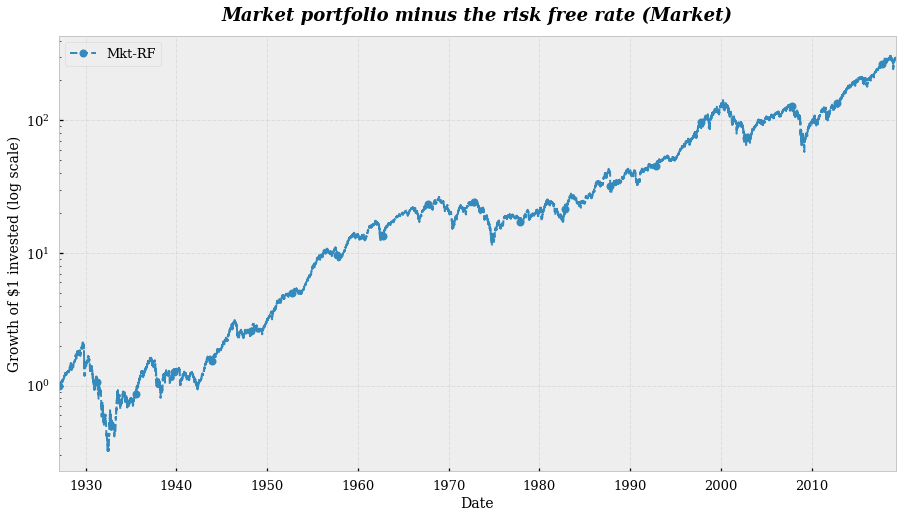

In [16]:
Mkt = Mkt_dic[0]
Mkt = pd.DataFrame(Mkt.loc[:,"Mkt-RF"], columns=["Mkt-RF"])
cumsum_plot(df=Mkt, title="Market portfolio minus the risk free rate (Market)")
Mkt.head()

 <a id='2.6'></a>
## Compare 4 factors
   - Market factor (Mkt-RF)
   - Value factor (HML)
   - Momemtum factor (WML)
   - 50-50 value-momemtum portfolio (HML-WML)

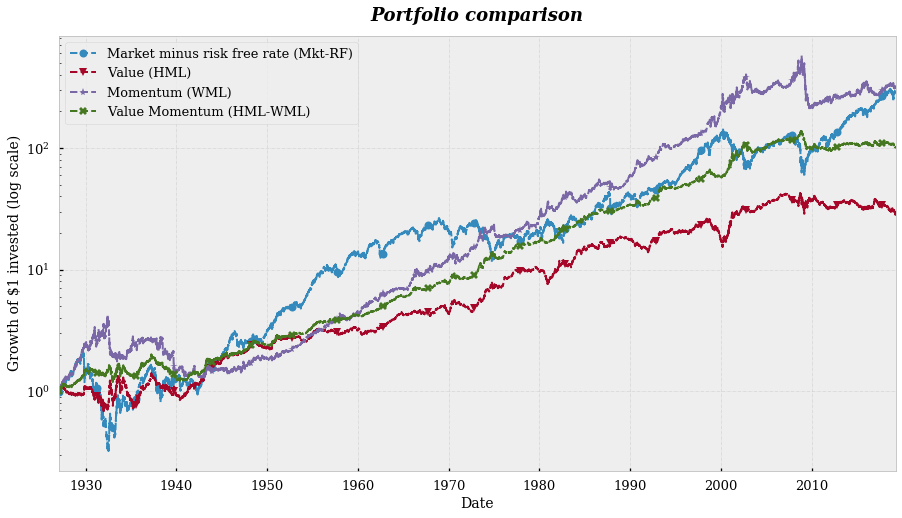

In [17]:
df_factors = pd.DataFrame(Mkt["Mkt-RF"], columns=["Mkt-RF"])
df_factors["HML"] = HML_LS
df_factors["WML"] = WML_LS
df_factors["HML-WML"] = HML_WML
df_factors["RF"] = Rf

# alternative legend labels
dic_fac = {
    "Mkt-RF": "Market minus risk free rate (Mkt-RF)",
    "HML": "Value (HML)",
    "WML": "Momentum (WML)",
    "HML-WML": "Value Momentum (HML-WML)",
    "RF":"Risk Free rate"
}

# plot
cumsum_plot(df=df_factors.iloc[:,:4], dic=dic_fac, title="Portfolio comparison")
df_factors.head()

# save data: there are the simple returns
df_factors.to_csv(PATH_DATA+"portfolios.csv",index=True)

<a id='Chapter3'></a>
# Chapter 3:  Risk- risk reward ratio's and Data exploration

Before starting with the simulation exercise, I introduce some performance statistics and perform some data exploration. The goal is to gain insights that give us intuition about the data.

<a id='3.1'></a>
## Return and risk reward ratio's 

**when working with log returns:** 


The **geometric mean** of quantities $\{a_{1}, \dots, a_{n}\}$ is

\begin{equation}
\overline{a}_{g}=(\prod_{i=1}^{n} a_{i})^{1 / n}
\end{equation}

Taking the logarithm of both sides gives
\begin{equation}
\log \overline{a}_{g}=\frac{1}{n} \sum_{i=1}^{n} \log a_{i}
\end{equation}


so the log of the geometric mean is equal to the arithmetic mean of the logs.
In  case, the relevant quantities $a_i$ are the growth rates over each period

\begin{equation}
a_{i}=1+r_{i}
\end{equation}

and plugging this into the above equation gives

\begin{equation}
\log (1+\overline{r}_{g})=\frac{1}{n} \sum_{i=1}^{n} \log(1+r_{i})
\end{equation}

\begin{equation}
\overline{r}_{g}=\exp(\frac{1}{n} \sum_{i=1}^{n} log(1+r_{i})-1
\end{equation}


Sometimes the geomtric return is  approximated by the following formula:

\begin{equation}
\overline{r}_{g}=\frac{1}{n} \sum_{i=1}^{n} \log (1+r_{i})
\end{equation}

this is because when the growth rate is small,

\begin{equation}
\log (1+\overline{r}_{g}) \approx \overline{r}_{g}
\end{equation}

it is often an approximation that you can get away with

**Simple raw returns**

- **Arithmetic return**: 

\begin{equation} R_{a} =
\frac{1}{n} \sum_{i=1}^{n} r_{i}=\frac{r_{1}+r_{2}+\cdots+r_{n}}{n}
\end{equation}

- **Geometric return**: 

\begin{equation} R_{g} = 
\sqrt[n]{(1+r_{1}) \times (1+r_{2}) \times \ldots(1+r_{n})}-1
\end{equation}

suppose returns are at daily frequency, to annualize the arithmetic or geometric I take $(1+R)^{252} - 1$ (assuming 252 trading days in a year)


- **Sharpe ratio**: one of the most common risk-reward ratios used in finance is the Sharpe ratio. The Sharpe ratio discounts the expected excess returns of a portfolio $ {E(r)-r_{f}} $ by the volatility of the returns $\sigma_r$. Formally, this can be described as follow:


\begin{equation}
S=\frac{E(r_{e})}{\sigma_{r}}=\frac{E(r)-r_{f}}{\sigma_{r}}
\end{equation}

$\sigma=\sqrt{\sigma^{2}}=\sqrt{\frac{1}{N} \sum_{i=1}^{N} (r_{i}-\mu)^{2}}$ and $\mu=\frac{1}{N} \sum_{i=1}^{N} r_{i}$

**Crude estimation of annualized volatility**

Most often volatility is annualized by multiplying by $\sqrt(n)$ where $n$ represents the time period (number of trading days or trading months). The formula uses the the fact that the standard deviation of the sum of $n$ independent variables (with equal standard deviations) is $\sqrt(n)$ times the standard deviation of the individual variables. This is only a crude approximation of the true volatility observed in financial markets and is only an accurate extrapolation if prices follow a random walk or Wiener process, whose steps have finite variance. As a result we will probably underestimate volatility. There are other ways (probably better) to measure volatility, but these are not the focus of this project.

**Lower Partial Moments (LPM)**

Whereas measures of risk-adjusted return based on volatility treat all deviations from the mean as risk, measures of risk-adjusted return based on lower partial moments  consider only deviations below some predefined minimum return threshold, $\tau$ as risk. For example, negative deviations from the mean is risky whereas positive deviations are not. A lower partial moment of order $j$ can be estimated from a sample of $k$ returns as follows: 

\begin{equation}
L P M_{j}(\tau)=\frac{1}{k} \sum_{i=1}^{k} \max \left(\tau-r_{i}, 0\right)^{j} 
\end{equation}


A useful classification of measures of risk-adjusted returns based on lower partial moments is by their order ($j$). The larger the order the greater the weighting will be on returns that fall below the target threshold ($\tau$), meaning that larger orders result in more risk-averse measures. Some popular measures using the equation above are:

   - **The Sortino ratio** was proposed as a modification to the Sharpe ratio. It discounts the excess return of a portfolio above a target threshold by the volatility of downside returns, $\delta^{2}$, instead of the volatility of all returns, $\sigma^2$. The volatility of downside returns is equivalent to the square-root second-order lower partial moment of returns. More formally this can be described as follow:
   
   \begin{equation}
S O R(\tau)=\frac{E(r_{e})}{\delta^{2}}=\frac{E(r)-\tau}{\delta^{2}}=\frac{E(r)-\tau}{\sqrt{L P M_{2}(\tau)}}
\end{equation}
   

   - **The Omega ratio** discounts the excess returns of a portfolio above the target threshold, usually the risk-free rate, by the first-order lower partial moment of the returns. The first-order lower partial moment corresponds to the average expected loss also known as downside risk. Formally the omega ratio is defined as follow:
   
   \begin{equation}
\Omega(\tau)=\frac{E(r_{e})}{L P M_{1(\tau)}}=\frac{E(r)-\tau}{L P M_{1}(\tau)}
\end{equation}
   

   - **The Kappa ratio** is a generalization of Omega and Sortino ratio.  It was shown that when the parameter $j$ of the Kappa ratio is set to one or two you get the Omega or Sortino ratio. The Kappa ratio is most often used with $j=3$ which is why it is often referred to as the Kappa 3 ratio. Formally:
   
   \begin{equation}
K_{j}(\tau)=\frac{E(r_{e})}{\sqrt[j]{L P M_{j}(\tau)}}=\frac{E(r)-\tau}{\sqrt[j]{L P M_{j}(\tau)}}
\end{equation}


Another measure to look at is risk is **Drawdown**.  It is the maximum decrease in the value of the portfolio over a specific period of time. Given the historical prices (values) for a portfolio, $S$, and a period of time, $t$, the drawdown of length $t$ over that period of time is the maximum distance between a previous two values $S_x$ and $S_{x−t}$,
   
   \begin{equation}
D(t)=\max \{0, \max _{t_{i} \in(0, t)}\{S_{t_{i}}-S_{t_{i}-t}\}\}
\end{equation}


**Maximum drawdown** can be thought of as a list of drawdowns calculated from the same historical portfolio values, $S$, but for the whole time period (or for different sub time periods, rolling window). The maximum drawdown of a portfolio is the maximum decrease in portfolio value from a previous high to a new low.

**% Time underwater** is the percentage time the investment is in in a drawdown state. 

Personally, I like measures based on drawdowns since they are extremely intuitive and are a very natural way to look at risk. Contrary to other measures, drawdown is path dependent. Furthermore, I very much enjoyed the presentation of Rober Frey (Former Quant of the Medallion fund) on drawdown [**180 years of market drawdown**](https://www.youtube.com/watch?v=27x632vOjXk&t=3349s).

**<font size="5">Helper functions</font>** 
 - `Kappa_ratio:` calculates the kappa ratio 
 - `drawdown:` calculates drawdown
 - `Anonymous functions (lambda):` performance functions stored in a dictionary
 -  `perf_stats:` a wrapper around the anonymous functions to give the possibility for selecting the function(s) of interest
 - `Return_DD:`calculates the cumulative return and drawdown in one figure
 - `boot_ci`: construct the bootstrap CI estimates for some performance metric
 - `SR_A_CI`: construct the CI using the assymptotic distribution of the SR from **[Opdyke, J. D. J. (2007)](https://link.springer.com/article/10.1057/palgrave.jam.2250084)**

In [18]:
"""
some anonymous function to calculate various (performance) statistics,
these functions are stored in a dictionary

params:

    - df: pandas dataframe with the raw returns
    - time_freq: an integer indicating the number of trading days
    - treshold: a float determining the level of drawdown is taken into account
      when calculating the percentage of time an investment is in a drawdown state


returns:

    - numpy array with the calculted statistic
"""


def P_Ar(time_freq=FREQUENCY, df=None):    return\
np.mean(df.values, axis=0)*time_freq


def P_Gr(time_freq=FREQUENCY, df=None):    return \
(np.exp(time_freq*np.mean(df.values/100, axis=0))-1)*100


def P_Avol(time_freq=FREQUENCY, df=None):    return \
np.std(df.values, axis=0) * np.sqrt(time_freq)


def P_Gvol(time_freq=FREQUENCY, df=None):    return \
(np.exp(np.sqrt(time_freq)*np.std(df.values/100, axis=0))-1)*100


# put functions into a dictionary, so we can choose which one to call
perf_stats_dic = {
    
    "Count":
    lambda df=None:df.describe().loc["count",:].values,
    "Skew":
    lambda df=None: df.skew().values,
    "Kurtosis":
    lambda df=None: df.kurtosis().values,
    "Median":
    lambda df=None: np.median(df.values, axis=0),
    "Mean":
    lambda df=None: np.mean(df.values, axis=0),
    "SD":
    lambda df=None: np.std(df, axis=0),
    "Terminal Wealth Relative":
    lambda df=None: np.exp((df / 100).cumsum()).iloc[-1, :] - 1,
    "Median Return (%)":
    lambda time_freq=FREQUENCY, df=None: np.median(df, axis=0) * FREQUENCY,
    "Arithmetic Return (%)":
    lambda time_freq=FREQUENCY, df=None: P_Ar(df=df, time_freq=time_freq),
    "Geometric Return (%)":
    lambda time_freq=FREQUENCY, df=None: P_Gr(df=df, time_freq=time_freq),
    "Arithmetric Volatility (%)":
    lambda time_freq=FREQUENCY, df=None: P_Avol(df=df, time_freq=time_freq),
    "Geometric Volatility (%)":
    lambda time_freq=FREQUENCY, df=None: P_Gvol(df=df, time_freq=time_freq),
    "Arithmetic SR":
    lambda time_freq=FREQUENCY, df=None: P_Ar(df=df, time_freq=time_freq) /
    P_Avol(df=df, time_freq=time_freq),
    "Geometric SR":
    lambda time_freq=FREQUENCY, df=None: P_Gr(
        df=df, time_freq=time_freq) / P_Gvol(df=df, time_freq=time_freq),
    "Kappa Ratio":
    lambda threshold_risk=0, threshold_return=0, order=3, time_freq=FREQUENCY,
    df=None: kappa_ratio(threshold_risk=threshold_risk,
                         threshold_return=threshold_return,
                         order=order,
                         time_freq=time_freq,
                         df=df),
    "Max Drawdown (%)":
    lambda df=None: np.max(drawdown(df=df), axis=0) * 100,
    "Calmar Ratio":
    lambda time_freq=FREQUENCY, df=None: P_Ar(df=df, time_freq=time_freq) / (
        np.max(drawdown(df=df), axis=0) * 100),
    "Max TUW (Year)":
    lambda time_freq=FREQUENCY, df=None: np.max(np.apply_along_axis(
        max_time_dd, 0, drawdown(df=df)),
                                                axis=0) / time_freq,
    "Underwater (%)":
    lambda df=None: np.sum(drawdown(df=df) != 0, axis=0) / len(df) * 100,
    f"(%) Underwater >{20} %":
    lambda treshold=0.20, df=None: np.sum(drawdown(df=df) > treshold, axis=0
                                          ) / len(df) * 100
}

### Convert to log space

I have decided to work in log space instead of simple returns.

In [19]:
# convert to log space
df_factors_log = np.log(1+df_factors/100)*100
df_factors_log.head()

,Mkt-RF,HML,WML,HML-WML,RF
Date,,,,,
1927-01-03,-0.793137,0.084964,0.034994,0.064979,0.01
1927-01-04,0.309520,-0.682323,-0.190181,-0.485175,0.01
1927-01-05,0.139902,-0.310481,-0.481156,-0.378716,0.01
1927-01-06,-0.170145,0.074972,-0.150113,-0.015001,0.01
1927-01-07,0.299551,0.439035,0.637961,0.518653,0.01


### Full period

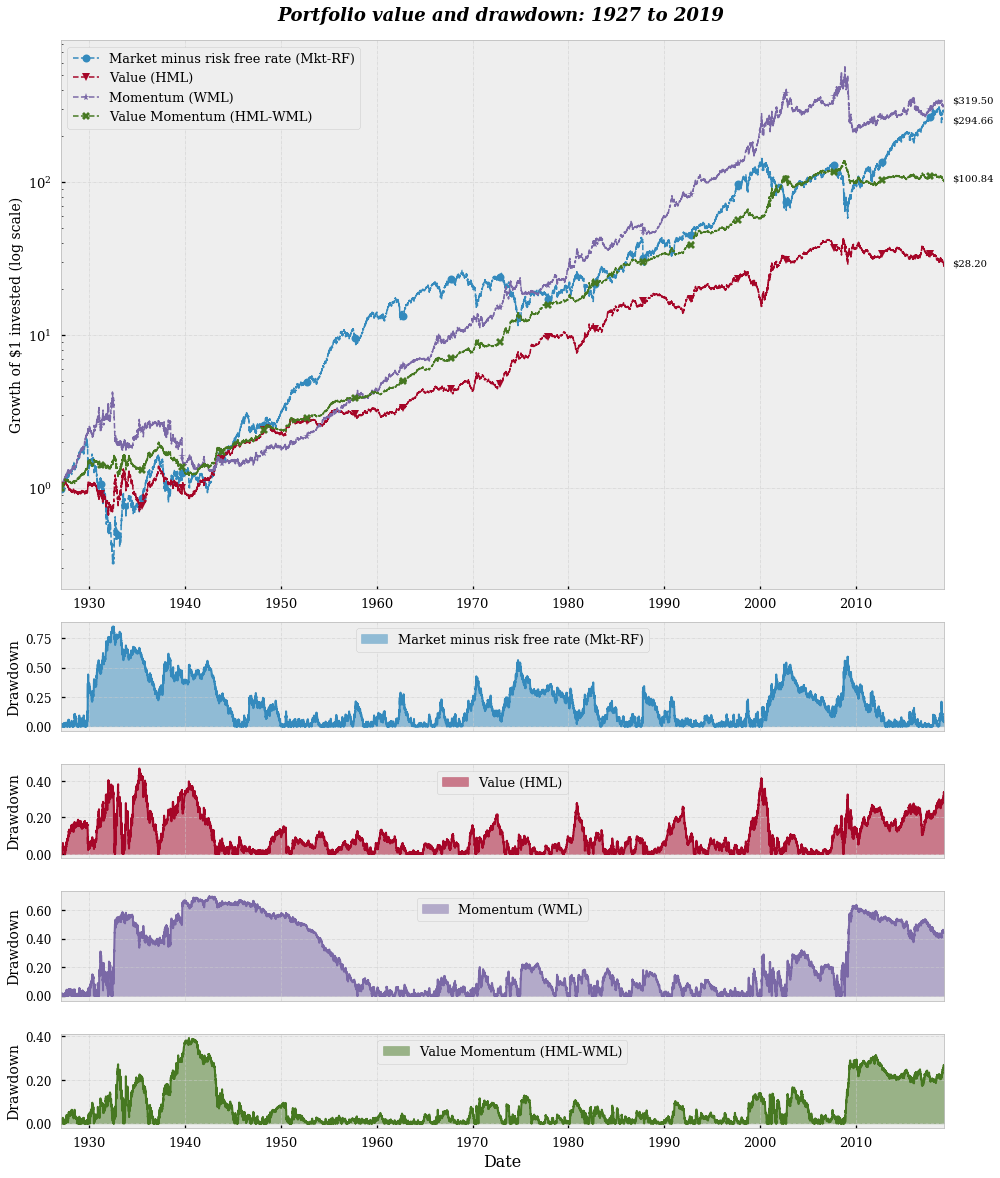

In [20]:
Return_DD(df=df_factors_log, 
          dic_labels=dic_fac, loc='upper center',
          time_frequency=FREQUENCY,
          height_ratio=[3.5, .7, .6, .7,.6],
          factor=['Mkt-RF', 'HML', 'WML','HML-WML'],
          add_rf=False,
          final_value=True,
          figsize=(14,16))
plt.savefig('Cum_return_DD', bbox_inches='tight') # save plot

###  Period: 1927-1935
 - crash of 1930

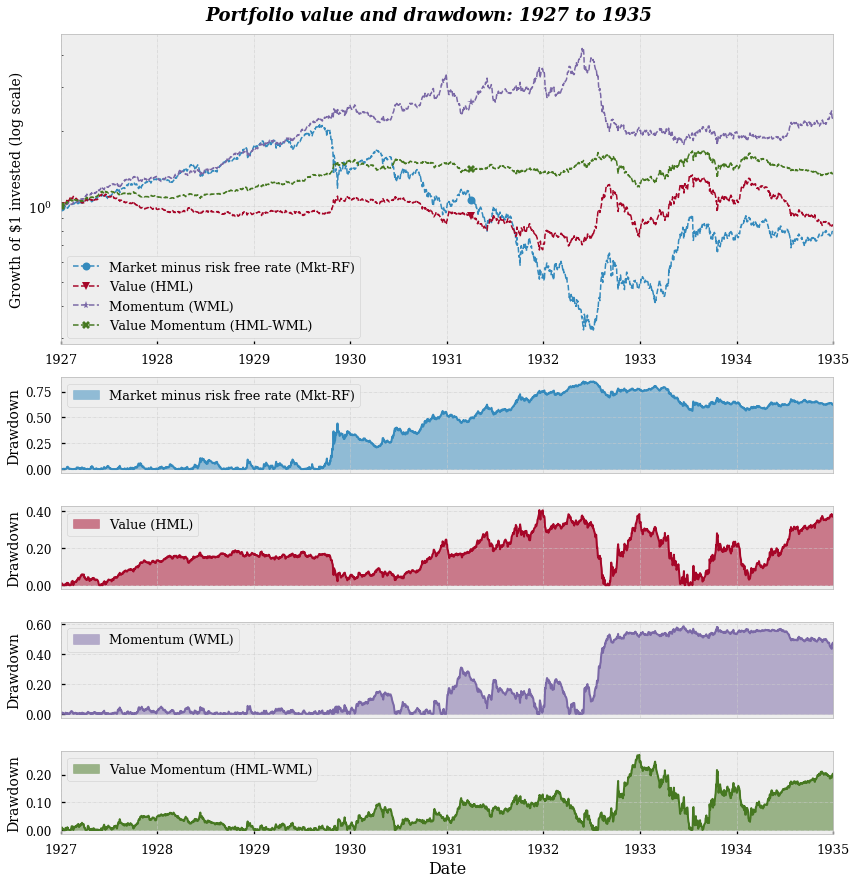

In [21]:
start, end = datetime.date(year=1927, month=1, day=1), datetime.date(year=1935,
                                                                     month=1,
                                                                     day=1)
Return_DD(df=df_factors_log,
          dic_labels=dic_fac,
          loc='upper left',
          start=start,
          end=end,
          time_frequency=FREQUENCY)

### Period: 1998-2010
 - Technology crash of 2000
 - Financial crash of 2007

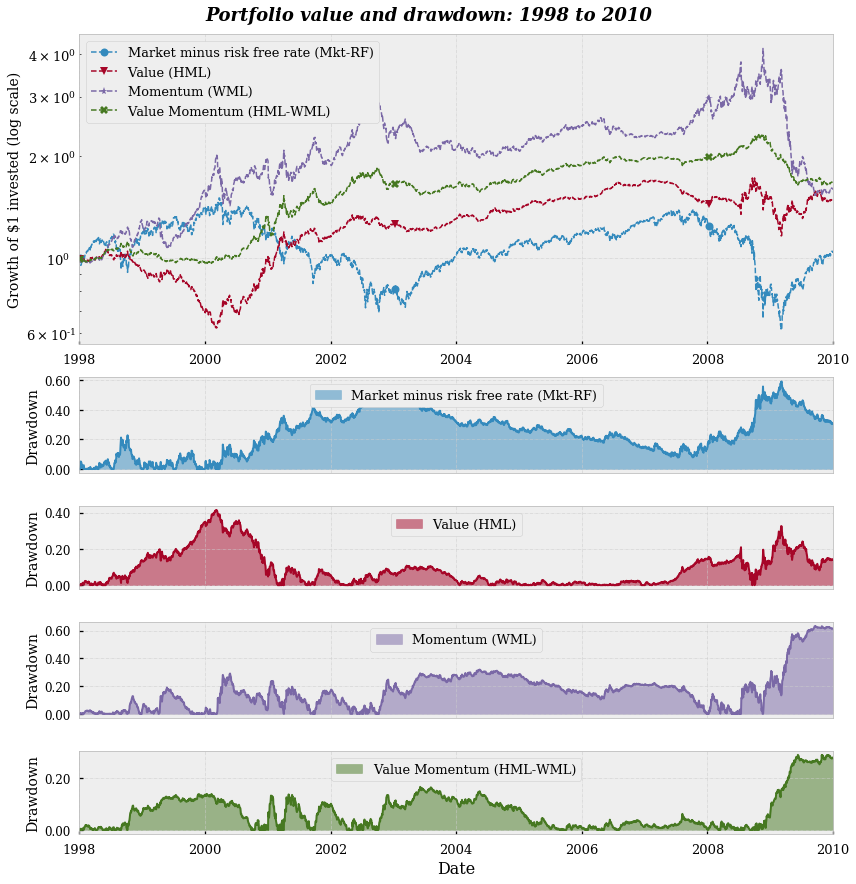

In [22]:
start, end = datetime.date(year=1998, month=1, day=1), datetime.date(year=2010,
                                                                     month=1,
                                                                     day=1)
Return_DD(df=df_factors_log,
          dic_labels=dic_fac,
          loc='upper center',
          start=start,
          end=end,
          time_frequency=FREQUENCY)

In all serious drawdown periods, momentum crashes when the market starts rebouncing. This is in line what's described in the literature. Also note the negative correlation between value and momentum and momentum and the market.

Increasing the power ($j$) of the `kappa ratio` gives higher weight to deviations below the treshold ($\tau$=0). It is interesting to see that the  momenetum strategy intially has a higher kappa ratio, but get surpassed around $j=3$ by the value portfolio. This means the momentum portfolio contains some large negative returns (tail events).

In [23]:
#print(round(df_factors_log.describe(),2).to_latex())
df_factors_log.describe()

,Mkt-RF,HML,WML,HML-WML,RF
count,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000
mean,0.023396,0.013741,0.023730,0.018984,0.012429
std,1.066797,0.584220,0.748770,0.422742,0.012000
min,-19.164488,-6.171584,-20.254467,-5.552328,-0.003000
25%,-0.400802,-0.240288,-0.240288,-0.155120,0.001000
50%,0.059982,0.005000,0.059982,0.027996,0.010000
75%,0.488803,0.254675,0.344406,0.201796,0.019998
max,14.634890,8.088850,6.775210,5.835381,0.060981


In [24]:
#print(round(perf_stat(df=df_factors_log.iloc[:,:4],dic_perf=perf_stats_dic,all_stats=True),2).to_latex())
round(perf_stat(df=df_factors_log.iloc[:,:4],dic_perf=perf_stats_dic,all_stats=True),2)

,Mkt-RF,HML,WML,HML-WML
Count,24302.00,24302.00,24302.00,24302.00
Skew,-0.42,0.59,-1.94,-0.23
Kurtosis,17.41,15.02,34.68,15.26
Median,0.06,0.00,0.06,0.03
Mean,0.02,0.01,0.02,0.02
SD,1.07,0.58,0.75,0.42
Terminal Wealth Relative,293.66,27.20,318.50,99.84
Median Return (%),15.12,1.26,15.12,7.06
Arithmetic Return (%),5.90,3.46,5.98,4.78
Geometric Return (%),6.07,3.52,6.16,4.90


**Some observations with respect to performance assessment of the four portfolios**

- Momentum seems to be the more "risky" strategy when looking at `skewness, kurtosis, kappa ratio` though it has not the highest `drawdown`. Note that the Sharpe ratio does not reveal this sort of information ( IMO, it does not make much sense to look at the Sharpe ratio when returns are not normally distributed).

- **Around 93%** of the time, the portfolios are in a state of drawdown (a state of regret). Meaning if we pick a random day, there is very high likelihood that there was some point in time we had more money. I think this an under appreciated fact and has a big impact on emotional state of investors. Note that this is not something specific for value or momentum investing. It is a feature of most investment strategies (even very good ones, see [**180 years of market drawdown**](https://www.youtube.com/watch?v=27x632vOjXk&t=3349s))

- Max time in DD (year): these are rather scary statistics; 28 year without making a single dime. OK we are looking at the extreme here, but still something to keep in mind.

- Big differences between the four portfolios when looking at the `(%) underwater > 20 %` (I kind of arbitrarily chose 20 % to indicate a big drawdown). The difference is especially large between the value and momentum strategy (43% vs 17%). Momentum experiences two very big drawdown period 1930-1960 and 2009-today.

- Combining value and momentum (HML-WML) improves risk adjusted performance on almost all statistics, though this relation is time dependent and seems to have disappeared over the last decade (see later).

#### Kappa ratio in function of the power ($j$)

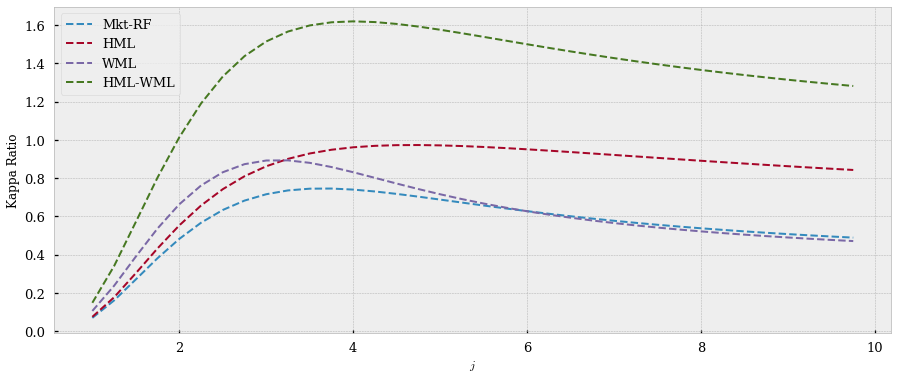

In [25]:
# just use the risk free rate: meaning we use excess return in the numerator

dic = {i: kappa_ratio(df=df_factors_log.iloc[:,:4],threshold_return=0,
       order=i, time_freq=FREQUENCY) for i in (np.arange(1, 10, 0.25))}

out = pd.DataFrame(dic).T
out = out.rename(columns={0: "Mkt-RF", 1: "HML", 2: "WML", 3: "HML-WML"})
fig = figsize = (15, 8)
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 6))
for i, c in enumerate(out.columns):
    ax1.plot(out.index, out[c], label=str(c), linestyle="--")
    ax1.set_xlabel("$j$")
    ax1.set_ylabel("Kappa Ratio")
    ax1.legend(loc='best')

### Test stationarity

In [26]:
for f in df_factors_log.columns:
    result = adfuller(df_factors_log.loc[:,f])
    print(f)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("")

Mkt-RF
ADF Statistic: -25.910487
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

HML
ADF Statistic: -23.523891
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

WML
ADF Statistic: -22.416326
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

HML-WML
ADF Statistic: -23.435928
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

RF
ADF Statistic: -2.548839
p-value: 0.104039
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567



### Confidence intervals for the sharpe ratio
 - bootstrap
 - analytical (asymptotic CI) 
     - **[Opdyke, J. D. J. (2007). Comparing Sharpe ratios: so where are the p-values?. Journal of Asset Management, 8(5), 308-336.](https://link.springer.com/article/10.1057/palgrave.jam.2250084)**
 
\begin{equation}
\sqrt{T}(\widehat{S R}-S R)^{a}-N\left(0,1+\frac{1}{2} S R^{2}-S R \cdot \gamma_{3}+S R^{2}\left[\frac{\gamma_{4}-3}{4}\right]\right), \text { where } \gamma_{3}=\frac{\mu_{3}}{\sigma^{3}} \text { and } \gamma_{4}=\frac{\mu_{4}}{\sigma^{4}}
\end{equation}

where $\gamma_{3}$ is the skewness and $\gamma_{4}$ kurtosis

The  standard error is estimated as follow (the papers notes it is common practise to divide by $n-1$, to get a less bias estimate)

\begin{equation}
\widehat{S E(\widehat{S R})} =\sqrt{\frac{1-\widehat{\gamma_{3}} \widehat{S R}+\frac{\hat{\gamma}_{4}-1}{4} \widehat{S R}^{2}}{n-1}}
\end{equation}

In [27]:
def sharpe_ratio(x, freq=FREQUENCY):
    mu, sigma = freq * x.mean(), np.sqrt(freq * x.var())
    values = np.array([mu, sigma, mu / sigma ]).squeeze()
    index = ['mu', 'sigma', 'SR']
    return pd.Series(values, index=index)

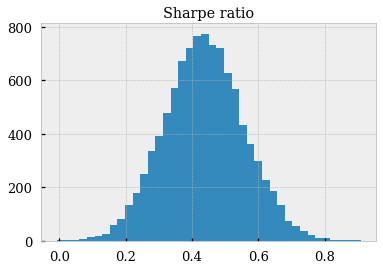

In [28]:
bs = CircularBlockBootstrap(BLOCKSIZE, df_factors.loc[:,"Mkt-RF"])
results = bs.apply(sharpe_ratio, 10_000)
CR = pd.DataFrame(results[:,-1:], columns=['Sharpe ratio'])
fig = CR.hist(bins=40)

#### Bootstrap CI

In [29]:
nr_boot = 10_000
ci_method = 'norm'


store_CI = []
store_CI = boot_ci(df=df_factors_log, func=sharpe_ratio, blocks=BLOCKSIZE,
                   store=store_CI, nr_boot=nr_boot, ci_method=ci_method, portfolio="Mkt-RF")
store_CI = boot_ci(df=df_factors_log, func=sharpe_ratio, blocks=BLOCKSIZE,
                   store=store_CI, nr_boot=nr_boot, ci_method=ci_method, portfolio="HML")
store_CI = boot_ci(df=df_factors_log, func=sharpe_ratio, blocks=BLOCKSIZE,
                   store=store_CI, nr_boot=nr_boot, ci_method=ci_method, portfolio="WML")
store_CI = boot_ci(df=df_factors_log, func=sharpe_ratio, blocks=BLOCKSIZE,
                   store=store_CI, nr_boot=nr_boot, ci_method=ci_method, portfolio="HML-WML")

In [30]:
CI_df = pd.concat(store_CI, axis=1, ignore_index=True).T
index = pd.MultiIndex.from_product(
        [["Mkt-RF","HML","WML","HML-WML"], ["mu","sigma",'SR']], names=["Portfolio", "Statistic"])
CI_df = pd.DataFrame(CI_df.values,index=index,columns=["lower","upper"])
round(CI_df,5)

lower     upper
Portfolio Statistic                    
Mkt-RF    mu          2.11460   9.67723
          sigma      15.23596  18.63380
          SR          0.11095   0.58536
HML       mu          1.01451   5.91077
          sigma       8.18547  10.36295
          SR          0.10925   0.63747
WML       mu          3.01372   8.94600
          sigma      10.53036  13.24235
          SR          0.22408   0.78209
HML-WML   mu          3.09617   6.47189
          sigma       5.93416   7.48750
          SR          0.45190   0.97387

#### asymptotic CI
 - annualized
 - original scale

In [31]:
# annualized
x = perf_stat(df=df_factors_log.iloc[:,:4],
              dic_perf=perf_stats_dic,all_stats=True).loc[["Skew","Kurtosis","Arithmetic SR"],:]

# do not take higher momentens into account
lower, upper = SR_A_CI(SR_e=x.loc["Arithmetic SR",:],
        Y3_e=x.loc["Skew",:],Y4_e=x.loc["Kurtosis",:],
        higher_moments=False,n=len(df_factors_log)/FREQUENCY)
pd.DataFrame({"lower":lower,"upper":upper})

,lower,upper
Mkt-RF,0.141541,0.554777
HML,0.165868,0.580872
WML,0.290152,0.716041
HML-WML,0.488220,0.937574


In [32]:
# annualized
# take higher momentens into account
lower, upper = SR_A_CI(SR_e=x.loc["Arithmetic SR",:],
        Y3_e=x.loc["Skew",:],Y4_e=x.loc["Kurtosis",:],
        higher_moments=True,n=len(df_factors_log)/FREQUENCY)
pd.DataFrame({"lower":lower,"upper":upper})

,lower,upper
Mkt-RF,0.083948,0.612370
HML,0.138367,0.608374
WML,0.087099,0.919094
HML-WML,0.345204,1.080590


In [33]:
# originial scale
# take higher moment not into account
lower, upper = SR_A_CI(df=df_factors_log.iloc[:,:4], higher_moments=False)
pd.DataFrame({"lower":lower,"upper":upper})

,lower,upper
Mkt-RF,0.009358,0.034506
HML,0.010945,0.036095
WML,0.019116,0.044268
HML-WML,0.032329,0.057488


In [34]:
# originial scale
# take higher momentens into account
lower, upper = SR_A_CI(df=df_factors_log.iloc[:,:4], higher_moments=True)
pd.DataFrame({"lower":lower,"upper":upper})

,lower,upper
Mkt-RF,0.009287,0.034577
HML,0.011020,0.036020
WML,0.018681,0.044703
HML-WML,0.032216,0.057601


### Calmar Ratio
  - bootstrap CI

In [35]:
def calmar_ratio(x, freq=FREQUENCY):
    mu = freq * x.mean()
    mdd = np.max(drawdown(df=x), axis=0)*100
    values = np.array([mu / mdd ]).squeeze()
    index = ['CR']
    return pd.Series(values, index=index)

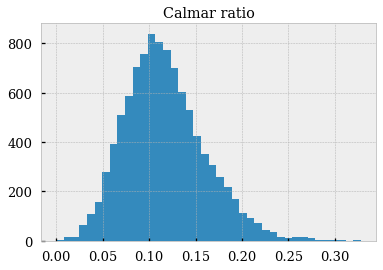

In [36]:
bs = CircularBlockBootstrap(FREQUENCY, df_factors.loc[:,"Mkt-RF"])
results = bs.apply(calmar_ratio, 10_000)
CR = pd.DataFrame(results[:,-1:], columns=['Calmar ratio'])
fig = CR.hist(bins=40)

#### Bootstrap CI

In [37]:
nr_boot = 10_000
ci_method = 'bca'
FREQUENCY=126
store_CI = []
store_CI = boot_ci(df=df_factors_log, func=calmar_ratio, blocks=BLOCKSIZE,
                   store=store_CI, nr_boot=nr_boot, ci_method=ci_method, portfolio="Mkt-RF")
store_CI = boot_ci(df=df_factors_log, func=calmar_ratio, blocks=BLOCKSIZE,
                   store=store_CI, nr_boot=nr_boot, ci_method=ci_method, portfolio="HML")
store_CI = boot_ci(df=df_factors_log, func=calmar_ratio, blocks=BLOCKSIZE,
                   store=store_CI, nr_boot=nr_boot, ci_method=ci_method, portfolio="WML")
store_CI = boot_ci(df=df_factors_log, func=calmar_ratio, blocks=BLOCKSIZE,
                   store=store_CI, nr_boot=nr_boot, ci_method=ci_method, portfolio="HML-WML")

In [38]:
CI_df = pd.concat(store_CI, axis=1, ignore_index=True).T
index = pd.MultiIndex.from_product(
        [["Mkt-RF","HML","WML","HML-WML"], ["CR"]], names=["Portfolio", "Statistic"])
CI_df = pd.DataFrame(CI_df.values,index=index,columns=["lower","upper"])
round(CI_df,5)

,,lower,upper
Portfolio,Statistic,,
Mkt-RF,CR,0.00148,0.12837
HML,CR,0.02277,0.17303
WML,CR,0.02193,0.15209
HML-WML,CR,0.03690,0.18327


<a id='3.2'></a>
## Data exploration

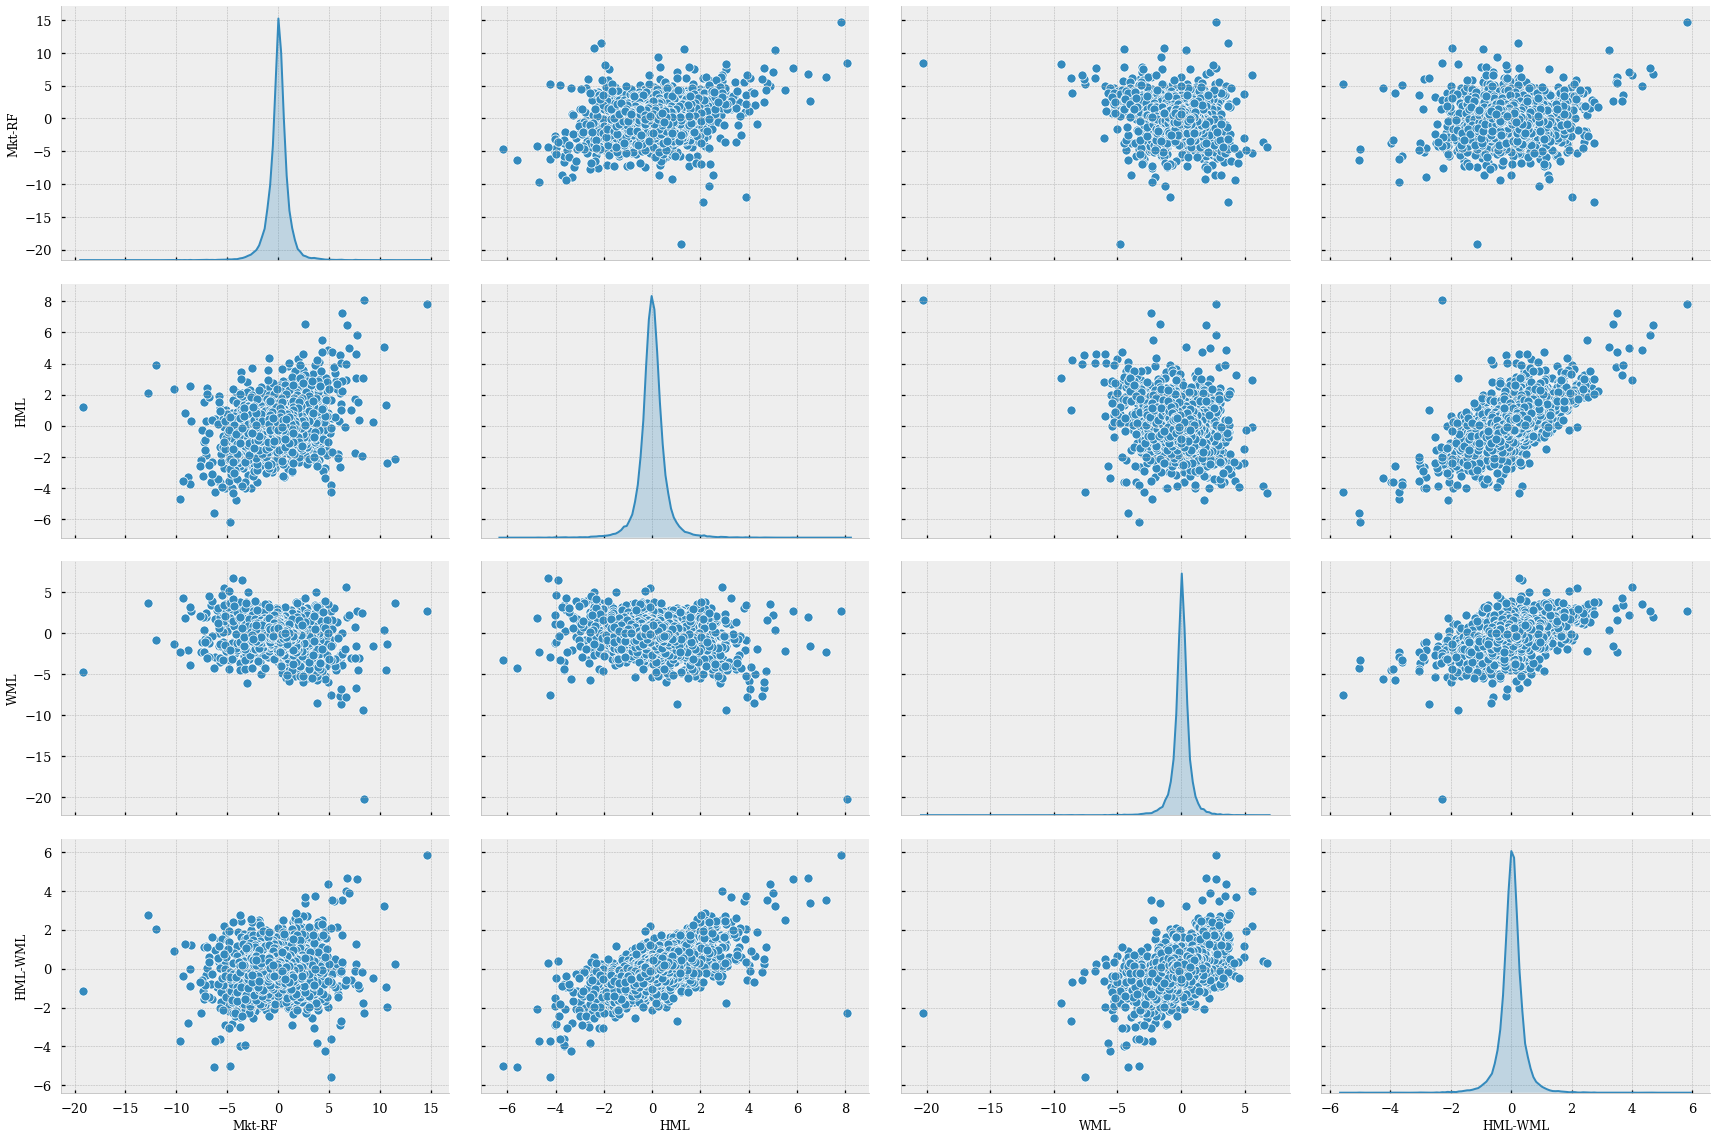

In [39]:
sns.pairplot(df_factors_log.iloc[:,:4], height=4, aspect=1.5, diag_kind="kde");

### look at the correlation structure
 - spearman: probably more appropriate here
 - pearson

In [40]:
sp_c = pd.DataFrame(stats.spearmanr(df_factors_log.iloc[:,:4])[0],
             columns=df_factors_log.columns[0:4],index=df_factors_log.columns[0:4])
#print(round(sp_c,2).to_latex())
sp_c

,Mkt-RF,HML,WML,HML-WML
Mkt-RF,1.000000,0.010564,0.030347,0.004758
HML,0.010564,1.000000,-0.054362,0.713450
WML,0.030347,-0.054362,1.000000,0.561578
HML-WML,0.004758,0.713450,0.561578,1.000000


In [41]:
ps_c = pd.DataFrame(np.corrcoef(df_factors_log.iloc[:,:4].T),
             columns=df_factors_log.columns[0:4],index=df_factors_log.columns[0:4])
round(ps_c,4)

,Mkt-RF,HML,WML,HML-WML
Mkt-RF,1.0000,0.1671,-0.1312,0.0474
HML,0.1671,1.0000,-0.1596,0.7194
WML,-0.1312,-0.1596,1.0000,0.5707
HML-WML,0.0474,0.7194,0.5707,1.0000


In [42]:
time = 252*3 # 3 year
sp_Mkt_HML = rolling_spearman_quick(seqa=df_factors_log.loc[:,"Mkt-RF"], 
                                    seqb=df_factors_log.loc[:,"HML"], window=time)

sp_Mkt_WML = rolling_spearman_quick(seqa=df_factors_log.loc[:,"Mkt-RF"], 
                                    seqb=df_factors_log.loc[:,"WML"], window=time)

sp_Mkt_HML_WML = rolling_spearman_quick(seqa=df_factors_log.loc[:,"Mkt-RF"], 
                                    seqb=df_factors_log.loc[:,"HML-WML"], window=time)

factors_rolling_sp = pd.DataFrame({"Mkt-RF:HML":sp_Mkt_HML.tolist(),
              "Mkt-RF:WML":sp_Mkt_WML.tolist(),
              "Mkt-RF:HML-WML":sp_Mkt_HML_WML.tolist()},
               index=df_factors_log.index).dropna()
factors_rolling_sp = factors_rolling_sp.ewm(com=252,min_periods=252).mean()

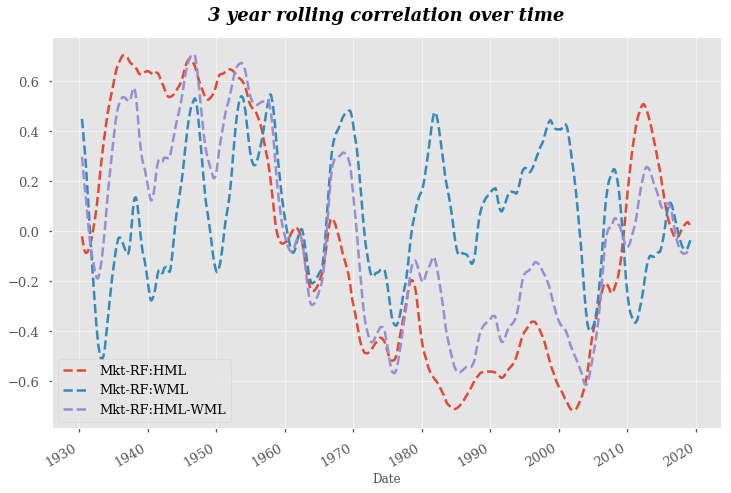

In [43]:
plt.style.use('ggplot')
ax = factors_rolling_sp.plot(figsize=(12,8),style = "--",lw=2.5);
ax.set_title(f"{int(time/252)} year rolling correlation over time",
                  y=1.025,style="italic",fontweight="bold",size=18);

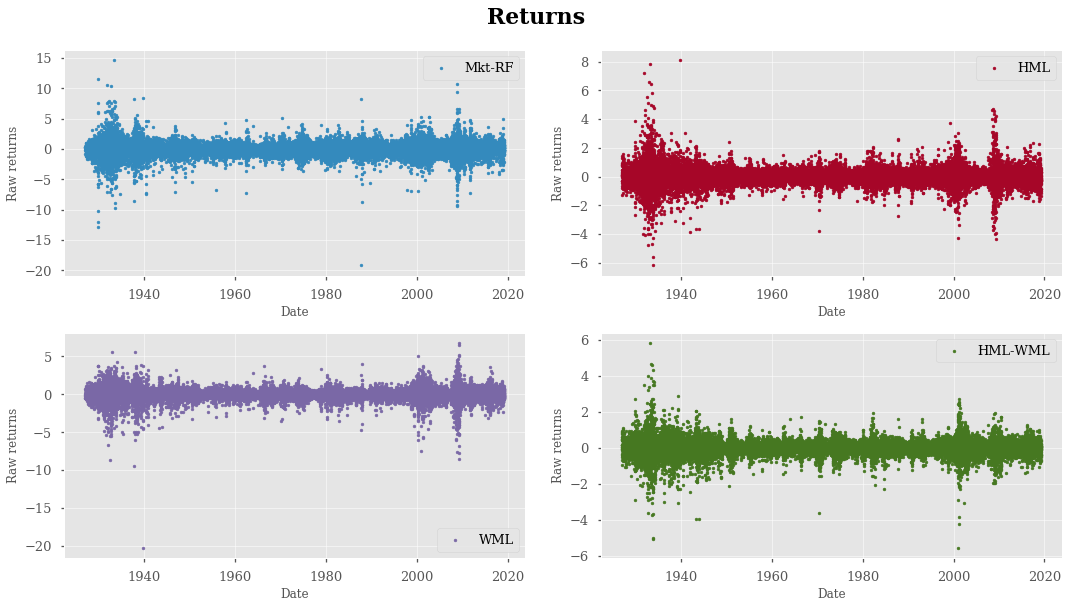

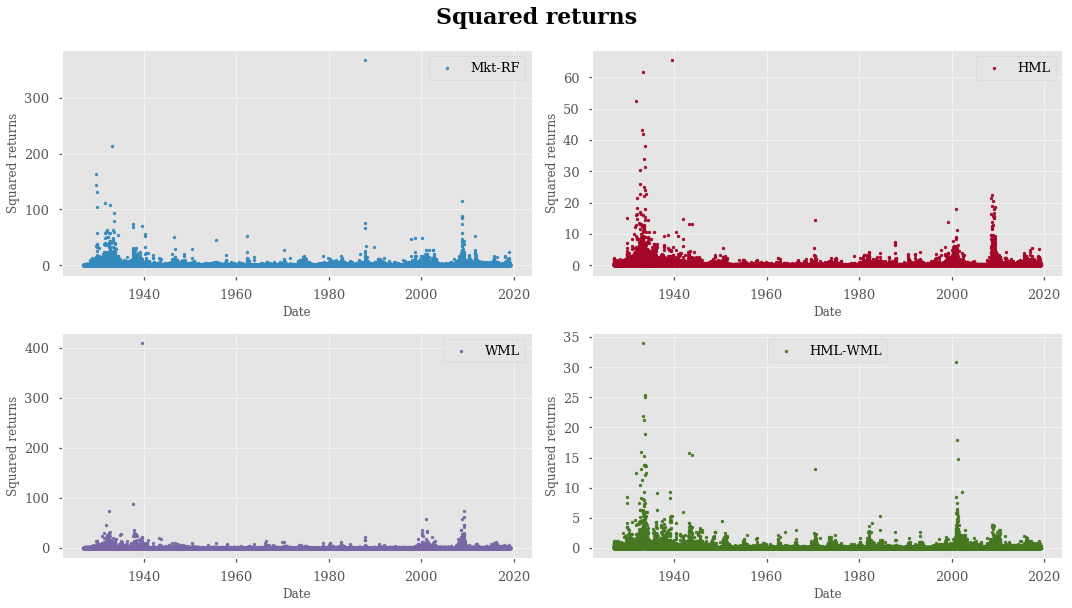

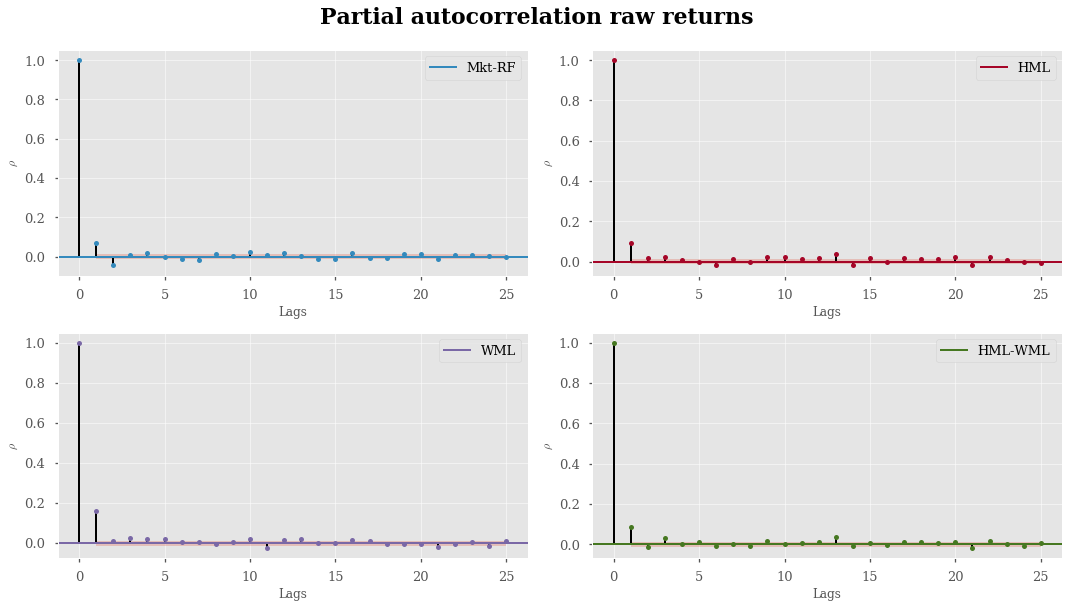

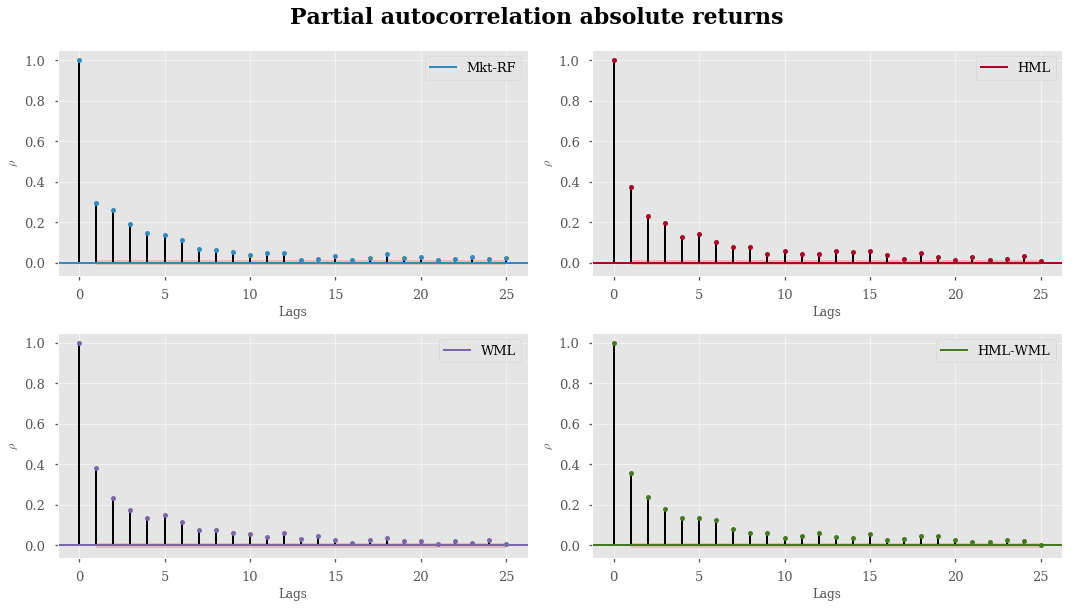

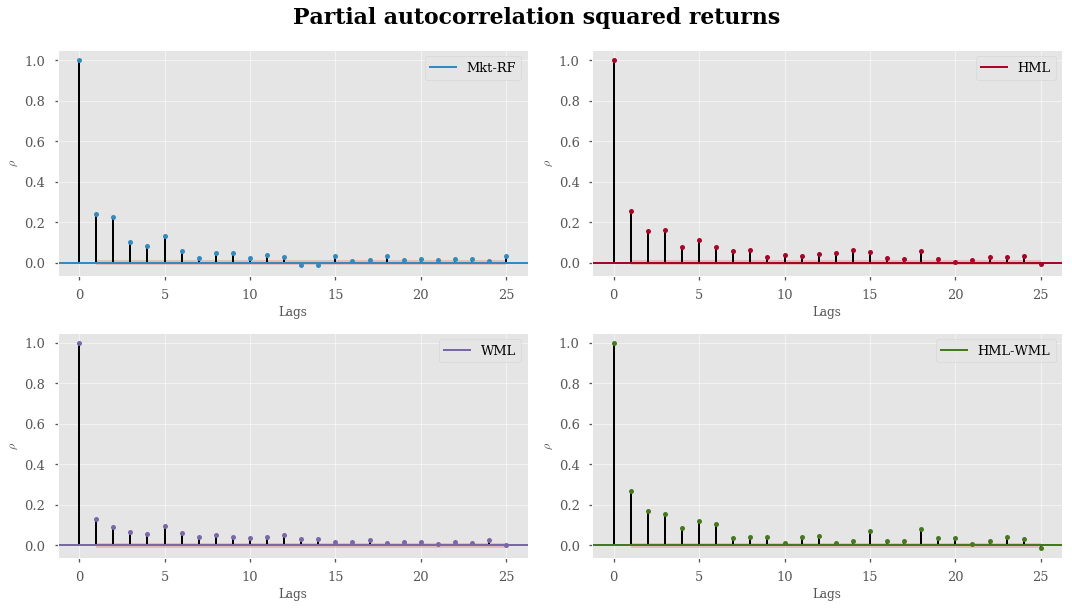

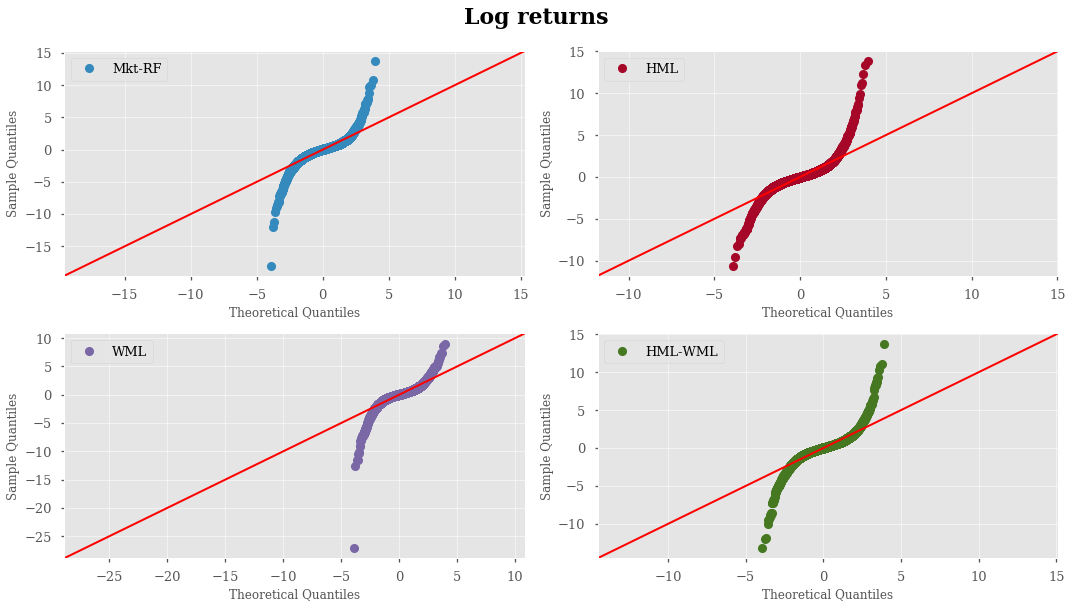

In [44]:
# Returns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.ravel()
index = df_factors_log.index
for i, j in enumerate(df_factors.iloc[:,:4].columns):
    axs[i].scatter(index,
                   df_factors_log.iloc[:, i].values,
                   label=j,
                   color=set2[i],
                   s=8)
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Raw returns")
    axs[i].legend(loc="best")
plt.tight_layout()
plt.suptitle('Returns', y=1.05, fontsize=22, fontweight="bold")

# Squared returns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.ravel()

for i, j in enumerate(df_factors.iloc[:,:4].columns):
    axs[i].scatter(index,
                   df_factors_log.iloc[:, i].values**2,
                   label=j,
                   color=set2[i],
                   s=8)
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Squared returns")
    axs[i].legend(loc="best")
plt.tight_layout()
plt.suptitle('Squared returns', y=1.05, fontsize=22, fontweight="bold")

# Partial autocorrelation: returns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.ravel()
for i, j in enumerate(df_factors_log.iloc[:,:4].columns):
    plot_pacf(df_factors.iloc[:, i].values,
              ax=axs[i],
              label=j,
              lags=25,
              color=set2[i])
    axs[i].set_xlabel("Lags")
    axs[i].set_ylabel('$\\rho$')
    axs[i].set_title("")
    #axs[i].set_ylim(-0.5,0.5)
    handles, labels = axs[i].get_legend_handles_labels()
    handles = handles[:-len(handles) // 3][0::1]
    labels = labels[:-len(handles) // 3][0::1]
    axs[i].legend(handles=handles, labels=labels, loc='best')
plt.tight_layout()
plt.suptitle('Partial autocorrelation raw returns',
             y=1.05,
             fontsize=22,
             fontweight="bold")

# Partial autocorrelation: squared returns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.ravel()
for i, j in enumerate(df_factors_log.iloc[:,:4].columns):
    plot_pacf(abs(df_factors_log.iloc[:, i]).values,
              ax=axs[i],
              label=j,
              lags=25,
              color=set2[i])
    axs[i].set_xlabel("Lags")
    axs[i].set_ylabel('$\\rho$')
    axs[i].set_title("")
    #axs[i].set_ylim(-0.5,0.5)
    handles, labels = axs[i].get_legend_handles_labels()
    handles = handles[:-len(handles) // 3][0::1]
    labels = labels[:-len(handles) // 3][0::1]
    axs[i].legend(handles=handles, labels=labels, loc='best')
plt.tight_layout()
plt.suptitle('Partial autocorrelation absolute returns',
             y=1.05,
             fontsize=22,
             fontweight="bold")

# Partial autocorrelation: squared returns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.ravel()
for i, j in enumerate(df_factors_log.iloc[:,:4].columns):
    plot_pacf(df_factors_log.iloc[:, i].values**2,
              ax=axs[i],
              label=j,
              lags=25,
              color=set2[i])
    axs[i].set_xlabel("Lags")
    axs[i].set_ylabel('$\\rho$')
    axs[i].set_title("")
    #axs[i].set_ylim(-0.5,0.5)
    handles, labels = axs[i].get_legend_handles_labels()
    handles = handles[:-len(handles) // 3][0::1]
    labels = labels[:-len(handles) // 3][0::1]
    axs[i].legend(handles=handles, labels=labels, loc='best')
plt.tight_layout()
plt.suptitle('Partial autocorrelation squared returns',
             y=1.05,
             fontsize=22,
             fontweight="bold")

# QQplot: log returns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.ravel()
for i, j in enumerate(df_factors_log.iloc[:,:4].columns):
    sm.qqplot(df_factors_log.iloc[:, i].values,
              fit=True,
              line='45',
              label=j,
              ax=axs[i],
              color=set2[i])
    axs[i].legend(loc="best")
plt.tight_layout()
plt.suptitle('Log returns', y=1.05, fontsize=22, fontweight="bold");

**some observations (all strategies)**

 - Returns are hetroskedastic:  return volatility is high during the 1930s, and one can argue that this period is a different regime, unlikely to repeat (some papers exclude the period 1927-1963 because of this, I personally disagree with this). In contrast, 1941–1962 is a period of relatively low return volatility. Thereafter, we observe similar behavior as in the 1930's.
 - Serial correlations in the simple returns is rather low, but much higher serial correlations in the absolute and squared returns (I am quite surprised, this is promising for the second part of the thesis).
 - Return are not normally distributed.

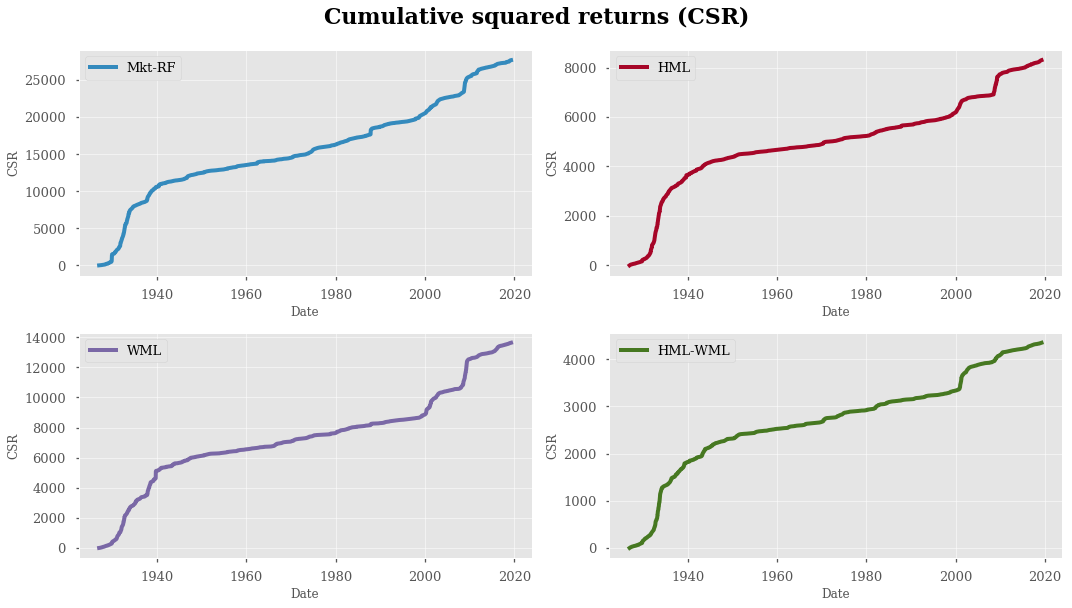

In [45]:
# Cumulative squared returns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.ravel()
for i, j in enumerate(df_factors_log.iloc[:,:4].columns):
    axs[i].plot(df_factors_log.index, (df_factors_log.iloc[:, i]**2).cumsum(),
                label=j,
                color=set2[i],
                lw=4)
    axs[i].legend(loc="best")
    axs[i].set_ylabel("CSR")
    axs[i].set_xlabel("Date")
plt.tight_layout()
plt.suptitle('Cumulative squared returns (CSR)',
             y=1.05,
             fontsize=22,
             fontweight="bold");

**Cumulative Squared Returns (CSR)**

The CSR is a “quick and dirty” approach to look at volatility regimes. The variance, $\sigma_r^2$, of return can be expressed by the following, where $R$  is the random variable representing return:

\begin{equation}
\sigma_{r}^{2}=\mathrm{E}\left[R^{2}\right]-\mathrm{E}[R]^{2}
\end{equation}

If we take the maximum likelihood estimate (MLE) for the sample variance, $\hat{s}_r^2$ , and multiply both sides by the sample size, $n$ , we have

\begin{equation}
n \hat{s}_{r}^{2}=\sum_{t=1}^{n} r(t)^{2}-\frac{\left(\sum_{t=1}^{n} r(t)\right)^{2}}{n}
\end{equation}

For most return time series the term to the left of the minus sign is much larger than the term on the right. This leads to the following approximation:

\begin{equation}
n \hat{s}_{r}^{2} \simeq \sum_{t=1}^{n} r(t)^{2}
\end{equation}

Thus, when plotting the cumulative square returns (CSR), the slope of the CSR line is approximately the variance of those returns. If the return switches from one stable volatility regime to another, then this shift shows as an abrupt change in slope of the CSR. This is a simple but powerful exploratory data analysis technique. The idea is to gain insights that give intuition about the data. Of course, you want to make sure that our insights make sense, but at this stage I am not super concerned with the formalities.


Looking at the CSR it does appear that a piecewise model yields a reasonably good description. There are extended periods where the slope is roughly constant, and these are separated by definite knits showing rapid transition from one regime to another.

**Next steps (difficult in python)**

My next step was to approximate the CSR with a piecewise linear model and look how these slopes change over time. The slope of the $i^{th}$ line segment ($\tau$)  would  the estimate of the constant variance. If we multiple each variance by $12$ or $252$ (depending if you use monthly or daily data) and then take the square root, then we have an annualized estimate of the standard deviation:

\begin{equation}
\hat{S}_{\text { annual }}\left(\tau_{i}\right)=\sqrt{252 \times \hat{s}_{\text { daily }}\left(\tau_{i}\right)^{2}}
\end{equation}


Doing the above in the **R programming language** seems a lot more practical (there are some packages which identify changing points). So far, I have experimented a bit with this, the problem is determining the cutpoints to fit the piecewise model (I tried with a simple decidision tree which gave actually nice results). If I have time left, I will take another look at this. Suggestions are also welcome.

<a id='Chapter4'></a>
# References

## Papers
- **[Arnott, R. D., Harvey, C. R., Kalesnik, V., & Linnainmaa, J. T. (2019). Alice’s Adventures in Factorland: Three Blunders  That Plague Factor Investing. Available at SSRN 3331680.](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3331680)**
- **[Fama, E. F., & French, K. R. (2018). Long-horizon returns. The Review of Asset Pricing Studies, 8(2), 232-252.](https://academic.oup.com/raps/article-abstract/8/2/232/4810768)**
- **[Fama, E. F., & French, K. R. (2012). Size, value, and momentum in international stock returns. Journal of financial economics, 105(3), 457-472.](https://www.sciencedirect.com/science/article/pii/S0304405X12000931)**
- **[Daniel, K., & Moskowitz, T. J. (2016). Momentum crashes. Journal of Financial Economics, 122(2), 221-247.](https://www.sciencedirect.com/science/article/pii/S0304405X16301490)**
- **[Radovanov, B., & Marcikić, A. (2014). A comparison of four different block bootstrap methods. Croatian Operational Research Review, 5(2), 189-202.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Radovanov%2C+B.%2C+%26+Marciki%C4%87%2C+A.+%282014%29.+A+comparison+of+four+different+block+bootstrap+methods.+Croatian+Operational+Research+Review%2C+5%282%29%2C+189-202&btnG=)**

- **[Singh, K., & Xie, M. (2008). Bootstrap: a statistical method. Unpublished manuscript, Rutgers University, USA. Retrieved from http://www. stat. rutgers. edu/home/mxie/RCPapers/bootstrap. pdf.](http://www.stat.rutgers.edu/home/mxie/stat586/handout/Bootstrap1.pdf)**
- **[Efron, B. (1992). Bootstrap methods: another look at the jackknife. In Breakthroughs in statistics (pp. 569-593). Springer, New York, NY.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Efron%2C+B.+%281979%29.+Bootstrap+methods%3A+Another+look+at+jackknife.+Ann.+Stat.+7%2C+1-26&btnG=)**

- **[Carlstein, E. (1986). The use of subseries values for estimating the variance of a general statistic from a stationary sequence. The annals of statistics, 14(3), 1171-1179.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Carlstein+%281986%29&btnG=)**

- **[Bailey, D. H., & Lopez de Prado, M. (2014). The deflated Sharpe ratio: Correcting for selection bias, backtest overfitting and non-normality. Journal of Portfolio Management, 40(5), 94-107.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=deflated+sharpe+ratio&btnG=)**

- **[Opdyke, J. D. J. (2007). Comparing Sharpe ratios: so where are the p-values?. Journal of Asset Management, 8(5), 308-336.](https://link.springer.com/article/10.1057/palgrave.jam.2250084)**


## Blogs, websites, presentations ...

- **http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html**
- **http://keplerianfinance.com/2013/06/the-relevance-of-history/**
- **http://www.blackarbs.com/blog/synthetic-data-generation-part-1-block-bootstrapping**
- **https://arch.readthedocs.io/en/latest/bootstrap/timeseries-bootstraps.html**
- **https://pandas-datareader.readthedocs.io/en/latest/remote_data.html**
- **http://www.ievbras.ru/ecostat/Kiril/R/Biblio_N/R_Eng/Chernick2011.pdf?fbclid=IwAR1f8UAc6s7FAGykclIB0usn0U9RGibNf6sB5ug2z9DEx9DoCK7Q-8nMVLk**
- **http://www.quantdevel.com/public/CSP2015/Talk/BootstrappingTimeSeriesData.pdf?fbclid=IwAR3FiKvHjfrg9zGZkm8aa07vMT15PkpxAYFLqvR50uBdGIjOgM0AY0nsd2U**
- **https://www.youtube.com/watch?v=-M1UtvoajUY**